<a href="https://colab.research.google.com/github/Semillero-de-Neuroinformatica-IA/DeepLearning--with-python/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

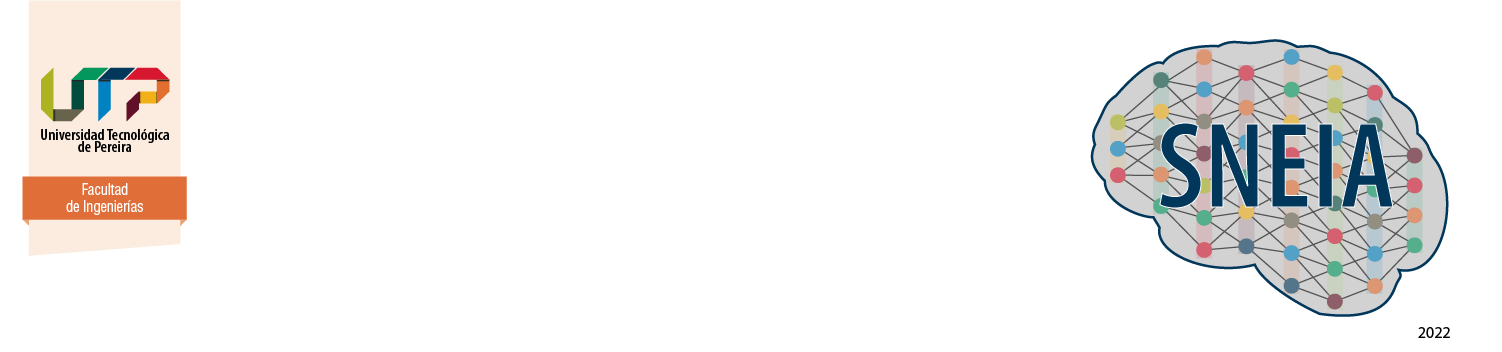

# Base de datos Mnist
En este ejemplo utlizaremos la base de datos MNIST. Esta base de datos. Esta base de datos consta de 60.000 imágenes de entrenamiento y 10.000 de prueba. Las imágenes corresponden a los números de l 0 al 9, por lo tanto se tienen 10 posibles clases para cada imagen. Esta base de datos hace parte de las bases de datos que trae Keras como ejemplo. 


---
### Cargamos las librerías necesarias para trabajar el ejemplo



In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#### A continuación cargamos la base de datos

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### Normalización de las bases de datos
Las redes neuronales no se encuentran diseñadas para trabajar con numeros grandes, debido a que en los procesos de multiplicación y en el cálculo de los gradientes para la optimización, se puede desboradar la memoria. Por lo tanto es una buena practica normalizar los datos. Cada pixel de la imagen varía de 0 a 255, representando un nivel de gris, con la normalización se acota este intervalo entre 0 y 1.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Construcción del modelo
Utilizaremos la librería Keras para construir el modelo. Se debe tener en cuenta que cada imagen es una matriz de 28 x 28, por lo tanto en la primera capa realiza un proceso la convierte en un vector de una dimensión con 784 elementos. La siguiente capa posee 128 neuronas con activación tipo [RELU](https://iq.opengenus.org/relu-activation/). Por último se crea una capa de 10 neuronas, donde cada una de ellas corresponde a una de las 10 clases del problema. Se utiliza la función de activación [softmax](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60), esta función devuelve una serie de probabilidad es de la ocurrencia de cada clase, tal cuál se muestra en el ejemplo de la figura a continuación:
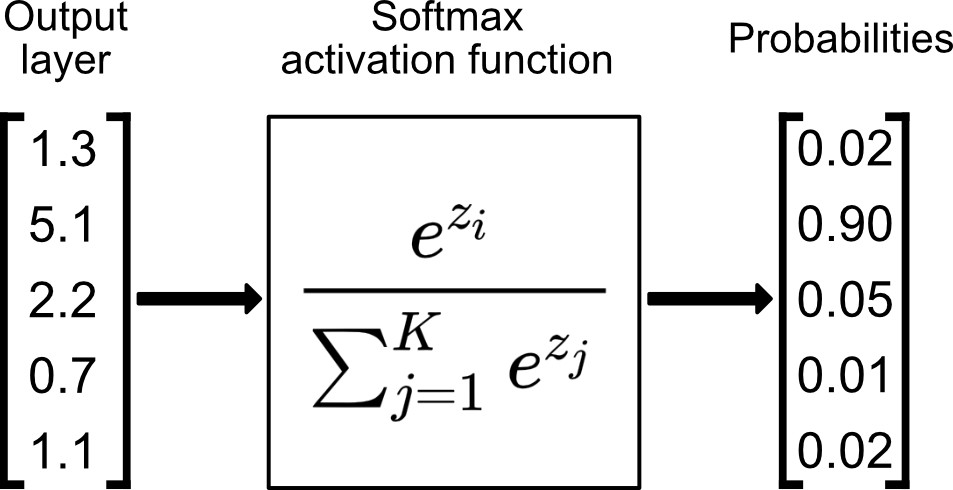

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Compilación del modelo
En la etapa de compilación definimos el optimizador, la función de perdida y la métrica utilizadas. Utilizaremos el optimizador [ADAM](https://www.geeksforgeeks.org/intuition-of-adam-optimizer/), el cuál es un método para el cálculo del gradiente descendiente que funciona muy bien en modelos con gran cantidad e parámetros. Se utiliza la medida de perdida [Sparse categorical entropy](https://vevesta.substack.com/p/here-is-what-you-need-to-know-about), la cuál sirve para medir distancia entre salidas por categorías o clases. La métrica usada será la precisión en la clasificación.

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Entrenamos el modelo 
Entrenamos el modelo utilizando las imágenes de entrenamiento y las etiquetas de entrenamiento.

In [6]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2604 - accuracy: 0.9260
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1162 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0803 - accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0601 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0288 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

### Evaluamos el modelo
Por último vamos a evaluar el modelo utilizando nuestras imágenes de prueba y nuestras etiquetas de prueba

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9748


### Salvar el modelo
Cuando estamos satisfechos con el resusltado obtenido por nuestro modelo se procede a ser guardado, y se hace utilizando el método save. El archivo queda en un formato *.h5

In [9]:
model.save('mnist_model.h5')